In [12]:
import warnings
warnings.filterwarnings('ignore')

##### Validación cruzada

In [13]:
import pandas as pd
from joblib import load
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

##### Cargar modelos entrenados

In [14]:
models = {
    "KNN": load("results/knn_model.joblib"),
    "DT": load("results/dt_model.joblib"),
    "SVM": load("results/svm_model.joblib"),
    "ADA": load("results/ada_model.joblib"),
    "GBC": load("results/gbc_model.joblib"),
    "RF": load("results/rf_model.joblib")
}

##### Leer datos y respuestas

In [15]:
train_data = pd.read_csv("process_dataset/train_data_scaled_robust.csv")
val_data = pd.read_csv("process_dataset/val_data.csv")
test_data = pd.read_csv("process_dataset/test_data.csv")

y_train = np.load("process_dataset/y_train.npy")
y_val = np.load("process_dataset/y_val.npy")
y_test = np.load("process_dataset/y_test.npy")

#### Ejecutar validación cruzada y calcular métricas de desempeño

In [16]:
results = []

for model_name, model in models.items():
    metrics = {
        "model": model_name,
        "acc": cross_val_score(model, train_data, y_train, cv=10, scoring="accuracy").mean(),
        "recall": cross_val_score(model, train_data, y_train, cv=10, scoring="recall").mean(),
        "precision": cross_val_score(model, train_data, y_train, cv=10, scoring="precision").mean(),
        "f1": cross_val_score(model, train_data, y_train, cv=10, scoring="f1").mean()
    }
    results.append(metrics)

df_result = pd.DataFrame(results)

#### Visualización de los resultados

In [17]:
df_result

,model,acc,recall,precision,f1
0,KNN,0.492920,0.467224,0.484266,0.475002
1,DT,0.513496,0.508987,0.498360,0.502426
2,SVM,0.499336,0.466776,0.490756,0.478199
3,ADA,0.503540,0.460875,0.495478,0.477284
4,GBC,0.505088,0.436228,0.495339,0.464132
5,RF,0.498230,0.416889,0.506037,0.452324


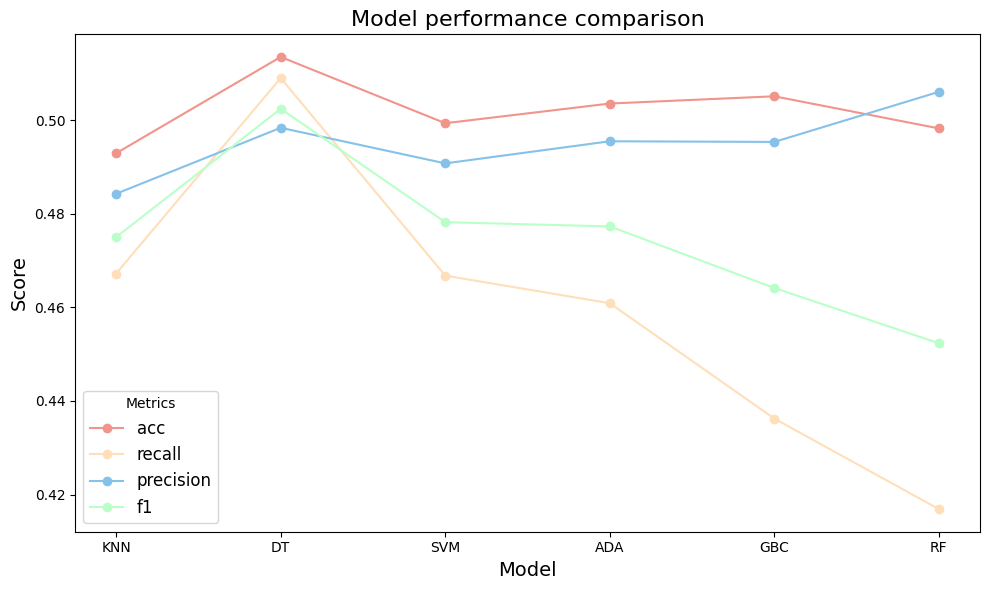

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
pastel_colors = ['#F1948A', '#FFDFBA', '#85C1E9', '#BAFFC9', '#BAE1FF', '#FFBAF0']

for metric, color in zip(['acc', 'recall', 'precision', 'f1'], pastel_colors):
    ax.plot(df_result['model'], df_result[metric], marker='o', label=metric, color=color)

ax.set_title('Model performance comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

ax.legend(title='Metrics', fontsize=12)
plt.tight_layout()
plt.show()